Importing Libraries and Loading Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("constituents-financials_csv.csv")
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Checking for Missing Values

In [6]:
print(df.isnull().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


Handling missing values - dropping rows with missing values

In [7]:
df.dropna(inplace=True)  

In [8]:
print(df.isnull().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


Data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          495 non-null    object 
 1   Name            495 non-null    object 
 2   Sector          495 non-null    object 
 3   Price           495 non-null    float64
 4   Price/Earnings  495 non-null    float64
 5   Dividend Yield  495 non-null    float64
 6   Earnings/Share  495 non-null    float64
 7   52 Week Low     495 non-null    float64
 8   52 Week High    495 non-null    float64
 9   Market Cap      495 non-null    int64  
 10  EBITDA          495 non-null    int64  
 11  Price/Sales     495 non-null    float64
 12  Price/Book      495 non-null    float64
 13  SEC Filings     495 non-null    object 
dtypes: float64(8), int64(2), object(4)
memory usage: 58.0+ KB


Unique Sectors

In [20]:
df["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

Identifying categorical columns

In [21]:
col_name_without_numeric_data = list(df.select_dtypes(exclude=[np.number]).columns)
print(f"Columns without numeric data: {', '.join(col_name_without_numeric_data)}")


Columns without numeric data: Symbol, Name, Sector, SEC Filings


Checking for duplicates in columns

In [22]:
for col in col_name_without_numeric_data:
    if df[col].duplicated().any() == True:
        print(f"column {col} contains duplicates.")
    else:
        print(f"column {col} does not contain duplicates.")

column Symbol does not contain duplicates.
column Name does not contain duplicates.
column Sector contains duplicates.
column SEC Filings does not contain duplicates.


Changing the data type

In [23]:
df["EBITDA"] = df["EBITDA"].astype("int64")

In [24]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9048000000,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,601000000,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5744000000,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,10310000000,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5643228000,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Summary Statistics

In [30]:
print(df.describe())

             Price  Price/Earnings  Dividend Yield  Earnings/Share  \
count   495.000000      495.000000      495.000000      495.000000   
mean    104.106505       24.654303        1.901477        3.815192   
std     135.372594       40.767081        1.541039        5.529133   
min       2.820000     -251.530000        0.000000      -24.620000   
25%      46.355000       15.350000        0.795585        1.525000   
50%      73.920000       19.450000        1.790190        2.890000   
75%     116.735000       25.770000        2.797169        5.120000   
max    1806.060000      520.150000       12.661196       44.090000   

       52 Week Low  52 Week High    Market Cap        EBITDA  Price/Sales  \
count   495.000000    495.000000  4.950000e+02  4.950000e+02   495.000000   
mean    122.985808     83.812053  4.937665e+10  3.576406e+09     3.953316   
std     156.480433    106.497350  9.069162e+10  6.880742e+09     3.485055   
min       6.590000      2.800000  2.626102e+09 -5.067000e+09 

Sector-wise Market Cap Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_28340\1210419177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Market Cap', data=df, palette="viridis")


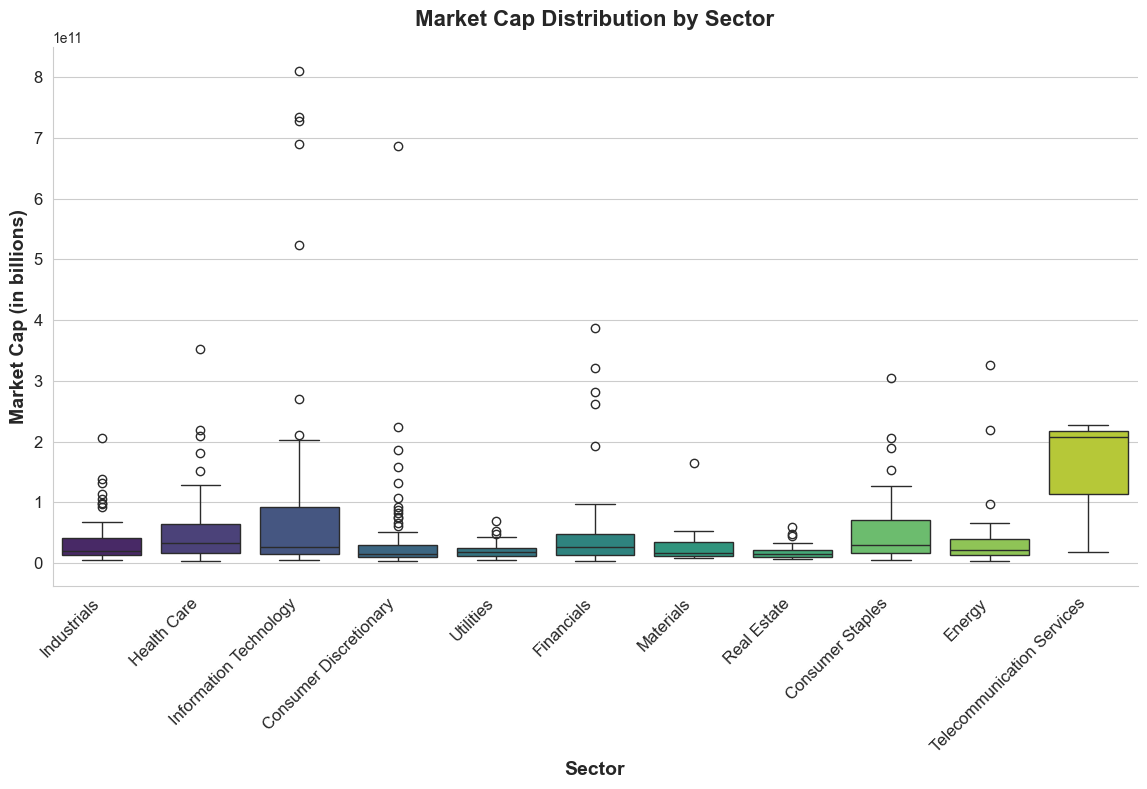

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sector', y='Market Cap', data=df, palette="viridis")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sector", fontsize=14, fontweight='bold')
plt.ylabel("Market Cap (in billions)", fontsize=14, fontweight='bold')
plt.title("Market Cap Distribution by Sector", fontsize=16, fontweight='bold', pad=15)

sns.despine()
plt.show()


Top 10 Companies by Market Cap

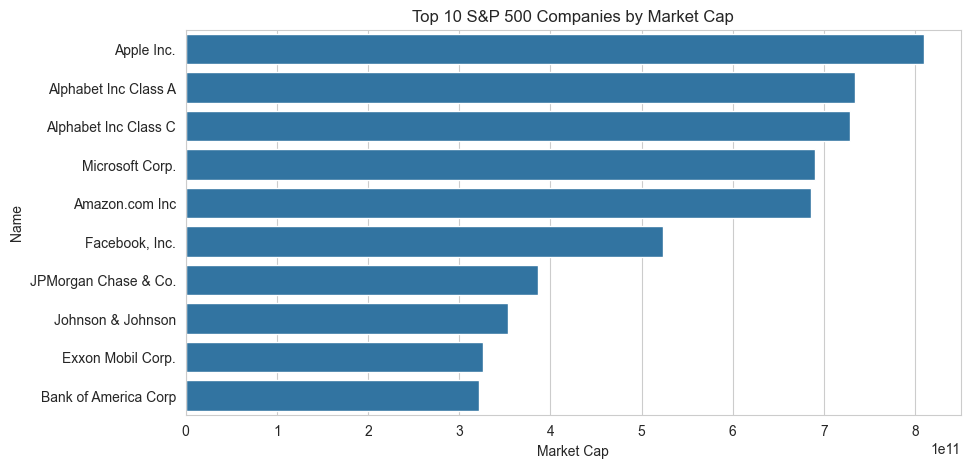

In [26]:
top_companies = df.nlargest(10, 'Market Cap')
plt.figure(figsize=(10,5))
sns.barplot(x='Market Cap', y='Name', data=top_companies)
plt.title("Top 10 S&P 500 Companies by Market Cap")
plt.show()

Correlation Matrix

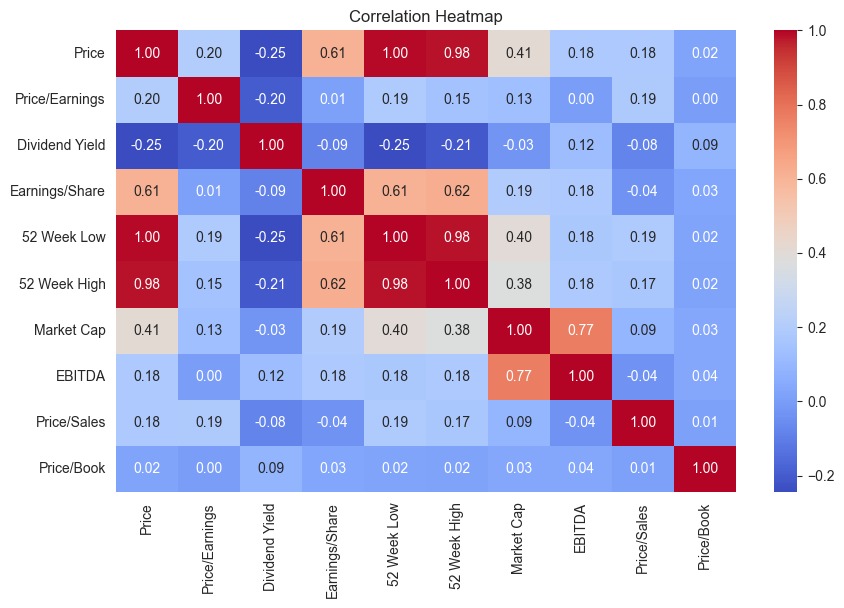

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

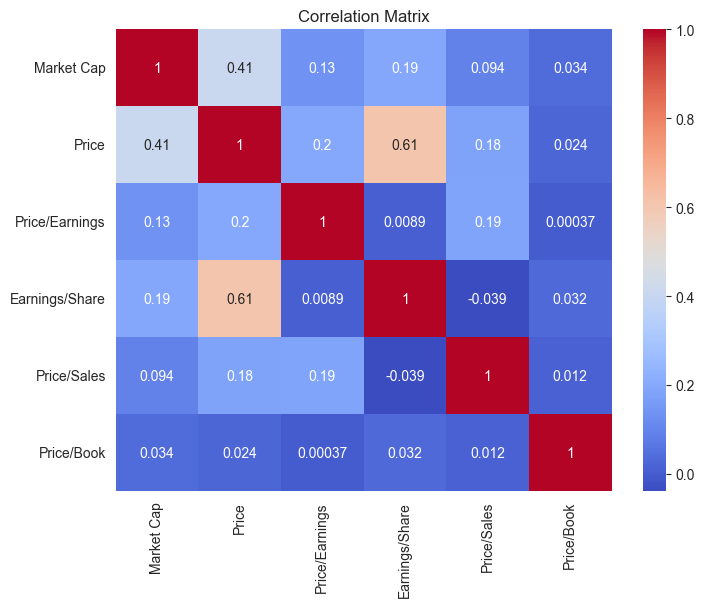

In [32]:
corr = df[['Market Cap', 'Price', 'Price/Earnings', 'Earnings/Share', 'Price/Sales', 'Price/Book']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Distribution of Stocl Prices

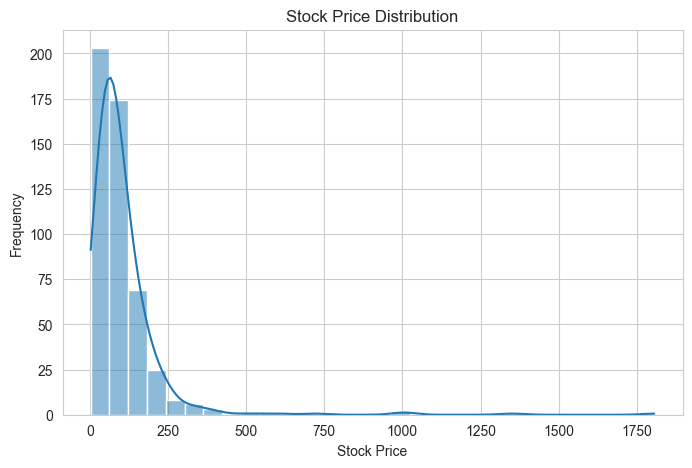

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Stock Price Distribution")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

Sector-wise Stock Price Analysis

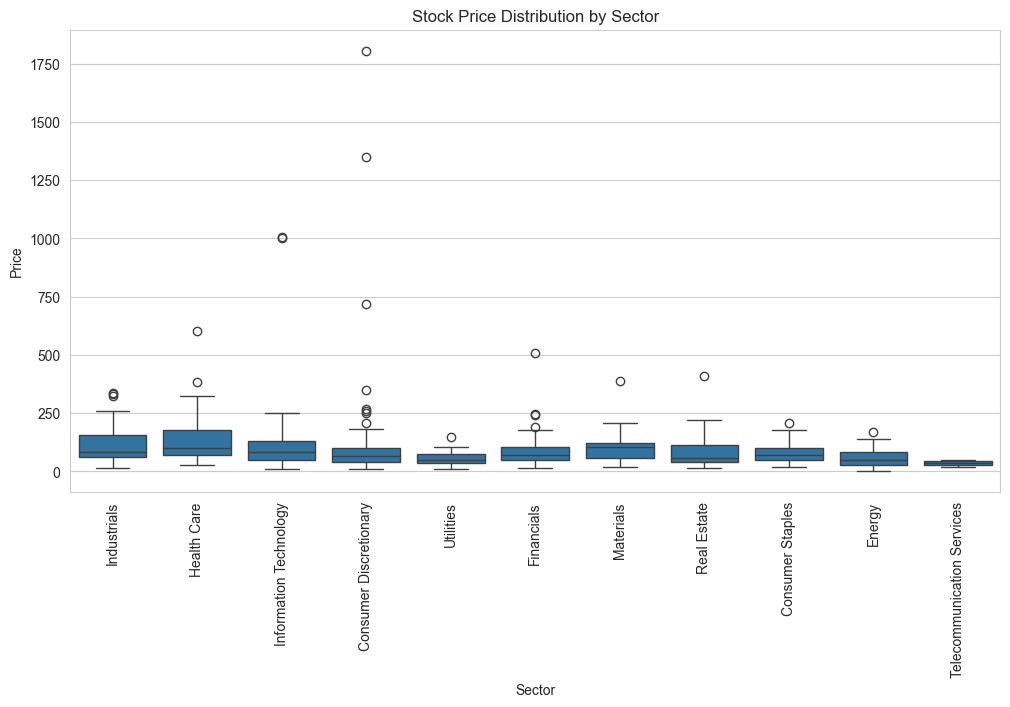

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Sector", y="Price", data=df)
plt.xticks(rotation=90)
plt.title("Stock Price Distribution by Sector")
plt.show()

Market Cap Vs. Stock Price

In [39]:
fig = px.scatter(df, x="Market Cap", y="Price", color="Sector",
                 title="Market Cap vs Stock Price", size="Market Cap",
                 hover_data=["Name"])
fig.show()

Linear Regression Analysis (Market Cap Prediction)

In [28]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df[['Price', 'Price/Earnings', 'Earnings/Share', 'Price/Sales', 'Price/Book']]
y = df['Market Cap']  

model = LinearRegression()
model.fit(X, y)

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression Coefficients: [ 2.98553647e+08  9.83009946e+07 -1.28169379e+09  4.10134981e+07
  2.64288768e+07]
Intercept: 20216312014.421543
